In [58]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("./stackoverflow.csv")
df.head(1)

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.0,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# compare salaries of people in UK and Germany
# to compare two normal distributions, we use the t-test
# note the salaries need not be converted, this is because
# of z-scores used within t-test
salary_uk = df.loc[df['Country'] == "United Kingdom"].Salary
salary_de = df.loc[df['Country'] == "Germany"].Salary
# T-Test: returns t-test statistic and p value
tstat, pval  = st.ttest_ind(a = salary_uk, b = salary_de)

# null hypothesis: both countries have similar salaries
if(pval > 0.05):
    # cannot reject null hypothesis
    print("UK and Germany have similar salaries")
else:
    print("both countries do not have similar salaries")

both countries do not have similar salaries


In [69]:
# T-test in experience between india and US 
# is experience level between indians and US similar?
experience_ind = df.loc[df['Country'] == "India"].YearsCodedJob
experience_us  = df.loc[df['Country'] == "United States"].YearsCodedJob

<Axes: ylabel='Density'>

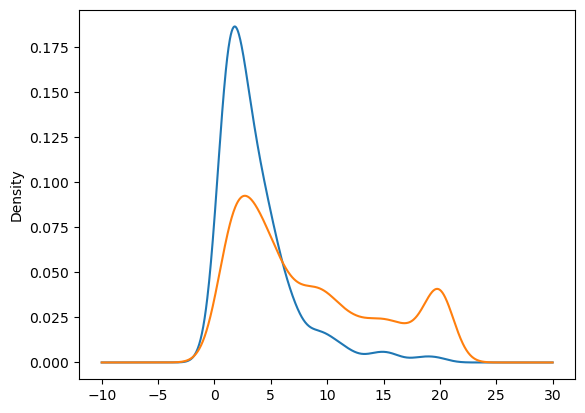

In [73]:
# visualizing the two distributions
experience_ind.plot.density()
experience_us.plot.density()
# blue is india, red is US
# US has more experienced people than india
# but are they statistically different?
# lets do t-test

In [71]:
tval, pval = st.ttest_ind(experience_ind, experience_us)
# null hypothesis: curves are similar
if(pval > 0.05):
    # the curves are similar, cannot reject null hypothesis
    print("Experience levels between india and US are similar")
else:
    # can reject null hypothesis
    print("experience levels between india and US are different")

experience levels between india and US are different


## Chi square test
Used to compare categorical variables as opposed to t-test which compares coninuous variables. Chi-square test compares the relative frequencies of two categorical variables to see if they are the same or not. 

```Note:
The null hypothesis in Chi square test is that there is NO relation between two categorical variables. 
This is different from null hypothesis of t-test, the two continuous variables are similar.
```

#### Question: Is there a relationship between people working remotely and the country in which they work


In [80]:
# here country and remote are both categorical variables 
# so lets look at the cross tabluation between two categorical variables
# for each country what is frequency of people who work remotely and who dont
tab = pd.crosstab(index = df.Country,
                  columns=df.Remote)
print(tab)

Remote          Not remote  Remote
Country                           
Canada                 457      28
Germany                717      40
India                  482      56
United Kingdom         953      70
United States         2410     381


In [83]:
chi2, pval, dof, exp = st.chi2_contingency(tab)
#null hypothesis: there is NO relation between countries
# and remote work
if(pval > 0.05): 
    # cannot reject null hypothesis
    print("there is no relationship between countries and remote work")
    pass
else:
    # reject null hypothesis
    print("there is a relationship between countries and remote work")

there is a relationship between countries and remote work


#### Question: Is there a relationship between company size and if people have hobbies

In [88]:
tab = pd.crosstab(df.CompanySizeNumber, df.Hobby)
print(tab)
chi2, pval, dof, exp = st.chi2_contingency(tab)
# null hypothesis: there is no relationship
if(pval > 0.05):
    # cannot reject null hypothesis
    print("There is no relationship between company size and hobby")
else:
    print("There is strong relationship between company size and hobby")
    # reject null hypothesis

Hobby                0    1
CompanySizeNumber          
1                  101  311
10                 123  400
20                 293  961
100                245  918
500                 91  309
1000               180  436
5000                60  192
10000              243  731
There is strong relationship between company size and hobby
